<a href="https://colab.research.google.com/github/gayathri12345/Deep-Learning-RNN-Notes/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-04-07 16:42:38--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-04-07 16:42:39 (45.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
!ls

moore.csv  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('moore.csv',header=None).values

In [ ]:
X=data[:,0].reshape(-1,1)

In [ ]:
Y=data[:,1]

In [ ]:
X.shape,Y.shape

((162, 1), (162,))

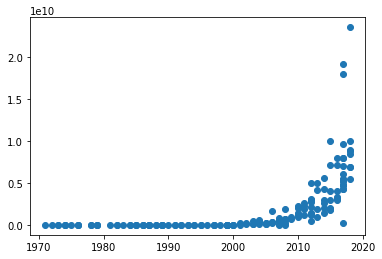

In [ ]:
plt.scatter(X,Y)  #exponential relation

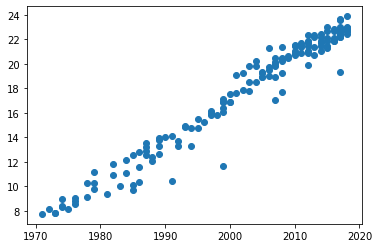

In [ ]:
log_Y=np.log(Y)
plt.scatter(X,log_Y)

In [ ]:
X_mod=X-X.mean()

In [ ]:
model=tf.keras.models.Sequential([
                                 tf.keras.layers.Input(shape=(1,)),
                                 tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

def schedule(epoch,learning_rate):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)
r=model.fit(X_mod,log_Y,epochs=100,callbacks=[scheduler])

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 328.6094
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 310.1508
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 411.4042
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 329.2909
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 163.1222
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 164.2555
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 103.6056
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 136.0632
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 66.8404
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 54.4226
Epoch 11/100
6/6 [==============================] - 0s 1ms/step - loss: 29.4900
Epoch 12/100
6/6 [==============================] - 0s 1ms/step - loss: 21.4647
Epoch 13/100
6/6 [=======================

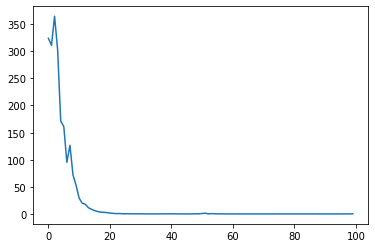

In [ ]:
plt.plot(r.history['loss'],label='loss')

In [ ]:
 model.layers

 #Input layer is a dummy layer, therefor only dense layer is present

In [ ]:
model.layers[0].get_weights()   #to display w and b values

[array([[0.32763064]], dtype=float32), array([17.792164], dtype=float32)]

In [34]:
#Predictions

In [35]:
yhat=model.predict(X_mod.flatten())

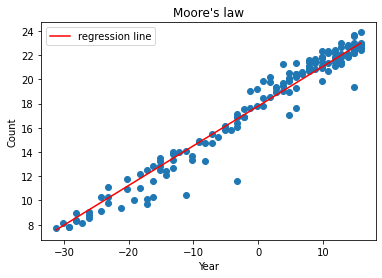

In [40]:
plt.scatter(X_mod,log_Y)
plt.plot(X_mod,yhat,label='regression line',color='red')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Moore's law")
plt.legend()

In [49]:
w,b=model.layers[0].get_weights()

X=X_mod.reshape(-1,1)

yhat1=(np.dot(X,w)+b).flatten()

In [50]:
np.allclose(yhat,yhat1)

True